# Geometry #7
Visualize the influence of parameters concerning inlets and outlets

## Initialization

In [1]:
# Import pyKasso and other useful packages
import pykasso as pk
import numpy as np

In [2]:
# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 100,
    'nz' : 50,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(project_name='geometry_07', grid_parameters=grid_parameters)
app.visualizer.notebook = True
nx, ny, nz = app.project.grid.shape
X, Y, Z = app.project.grid.get_meshgrids()
x = X[:,:,0]
y = Y[:,:,0]

In [3]:
# Construct the topography
topography = np.sin(y/120)*80 + 400
# app.visualizer.pv_plot_array(topography)

In [4]:
# Construct the water table
water_table = np.linspace(300, 200, nx)
water_table = np.repeat(water_table[:, np.newaxis], ny, axis=1)
water_table = np.sin(x/40)*7 + water_table
# app.visualizer.pv_plot_array(water_table)

In [5]:
# Construct the bedrock
z_valley = np.linspace(200, 0, 100)
bedrock = []
for z in z_valley:
    line = np.append(np.linspace(200+z, z, 50), np.linspace(z, 200+z, 50)) 
    bedrock.append(line)
bedrock = np.vstack(bedrock)
# app.visualizer.pv_plot_array(bedrock)

## 1 outlet

In [6]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 7777,
        'mode' : 'D'
    },
    'domain' : {
        'topography' : topography,
        'water_table' : water_table,
        'bedrock' : bedrock
    },
    'outlets' : {
        'number'     : 1,
        'data'       : [[994, 500]],
        'importance' : [1],
        'subdomain'  : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 50,
        'per_outlet' : [1],
        'importance' : [1, 5, 9],
        'subdomain'  : 'domain_surface',
    },
}

In [7]:
# Compute karst conduit networks
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

In [8]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    'surfaces_options' : {
        'bedrock' :  {
            'opacity' : 1,
            'cmap': 'copper'
        },
        'water_table' : {
            'opacity' : 0.5,
            'cmap': 'Blues_r'
        }
    },
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings,
                       cpos=[1,-1,1])

# 2 outlets disconnected

In [10]:
# Change the parameters
model_parameters = {
    'sks' : {
        'seed' : 7777,
        'mode' : 'D'
    },
    'domain' : {
        'topography' : topography,
        'water_table' : water_table,
        'bedrock' : bedrock
    },
    'outlets' : {
        'number'     : 2,
        'data'       : [[994, 500], [0, 500]],
        'importance' : [1],
        'subdomain'  : 'phreatic_borders_surface',
    },
    'inlets' : {
        'number'     : 50,
        'per_outlet' : [1],
        'importance' : [1, 5, 9],
        'subdomain'  : 'domain_surface',
    },
}

In [11]:
# Compute karst conduit networks
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

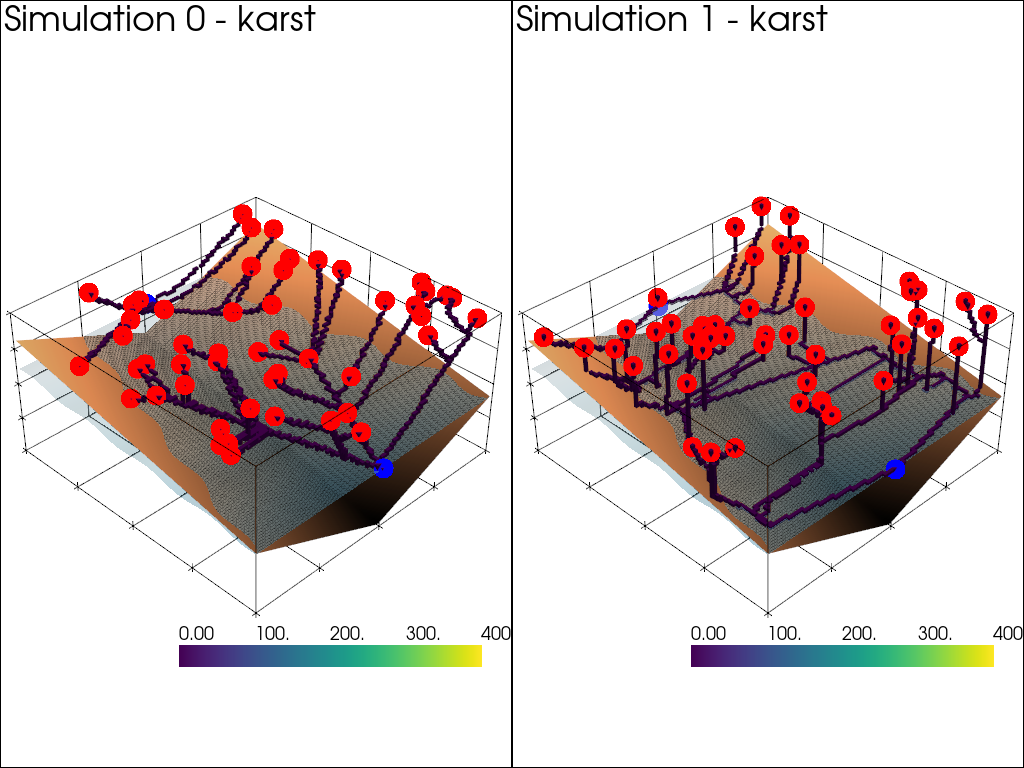

In [12]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    'surfaces_options' : {
        'bedrock' :  {
            'opacity' : 1,
            'cmap': 'copper'
        },
        'water_table' : {
            'opacity' : 0.5,
            'cmap': 'Blues_r'
        },
        # 'topography' : {}
    },
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings,
                       cpos=[1,-1,1])

# 2 outlets connected

In [13]:
# Change the parameters
model_parameters = {
    'sks' : {
        'seed' : 7777,
        'mode' : 'D'
    },
    'domain' : {
        'topography' : topography,
        'water_table' : water_table,
        'bedrock' : bedrock
    },
    'outlets' : {
        'number'     : 2,
        'data'       : [[994, 500], [0, 500]],
        'importance' : [1, 1],
        'subdomain'  : 'phreatic_borders_surface',
    },
    'inlets' : {
        'number'     : 50,
        'per_outlet' : [1, 3],
        'importance' : [1, 5, 9],
        'subdomain'  : 'domain_surface',
    },
}

In [14]:
# Compute karst conduit networks
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

Tip {597.392,935.885,479.847} yields 6 restarts, geodesicVolumeBound increased to 18.5647Tip {627.392,965.885,479.847} yields 6 restarts, geodesicVolumeBound increased to 18.5647Tip {577.392,905.885,479.847} yields 6 restarts, geodesicVolumeBound increased to 18.5647

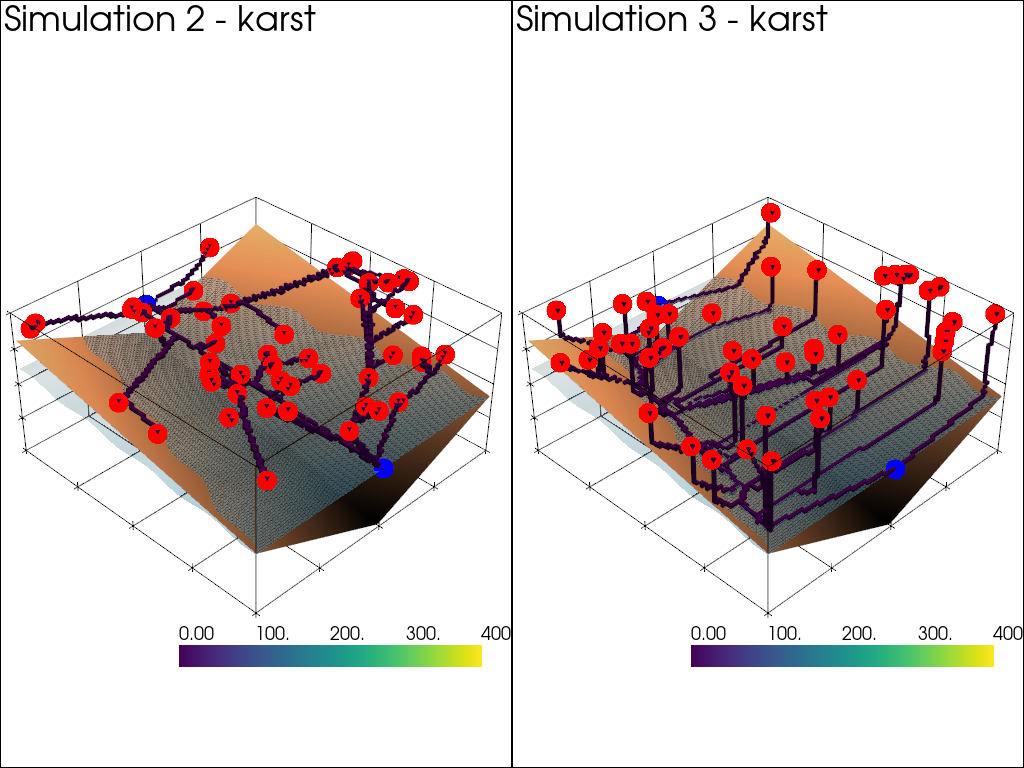

In [15]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    'surfaces_options' : {
        'bedrock' :  {
            'opacity' : 1,
            'cmap': 'copper'
        },
        'water_table' : {
            'opacity' : 0.5,
            'cmap': 'Blues_r'
        },
        # 'topography' : {}
    },
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings,
                       cpos=[1,-1,1])